# Worksheet 23 (Origional)

Name:  Sumatra Dhimoyee

UID: U26967910

### Topics

- Tuning Neural Networks

## Tuning Neural Networks

Nothing to do in this worksheet except follow along in lecture / use this code to better understand Neural Networks.

In [ ]:
!pip install tensorflow

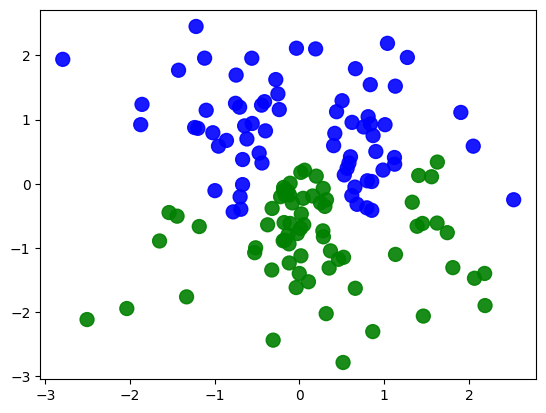

3602/3602 [==============================] - 11s 3ms/step


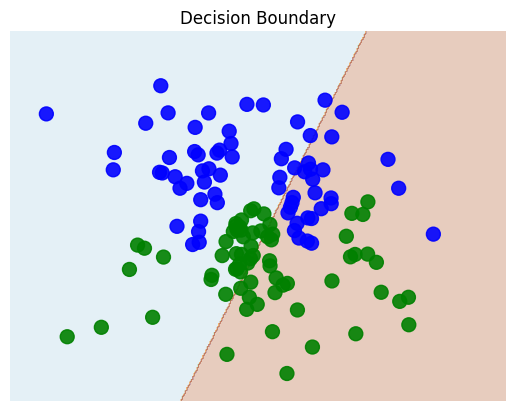

Loss: [0.8851890563964844, 0.8801405429840088, 0.8766418099403381, 0.8737438917160034, 0.8710445761680603, 0.8685042858123779, 0.8660841584205627, 0.8638750314712524, 0.8616217374801636, 0.8594363927841187, 0.8571481704711914, 0.8551567196846008, 0.8530105948448181, 0.8510312438011169, 0.8491072654724121, 0.8471686840057373, 0.8451966047286987, 0.8432197570800781, 0.8411403298377991, 0.8393063545227051, 0.8373705148696899, 0.835517942905426, 0.8336349129676819, 0.8318907618522644, 0.8299822211265564, 0.8281461596488953, 0.826299786567688, 0.8244137167930603, 0.8226295113563538, 0.8209291696548462, 0.8191822171211243, 0.8175468444824219, 0.8158278465270996, 0.8141767978668213, 0.8125004768371582, 0.8108986616134644, 0.809242844581604, 0.8076117038726807, 0.8060157299041748, 0.804416298866272, 0.8028256297111511, 0.8011504411697388, 0.7995659112930298, 0.798053503036499, 0.79649817943573, 0.7950059175491333, 0.7933341860771179, 0.7919570207595825, 0.7903336882591248, 0.788899302482605, 0

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200,verbose=0) #Verbose=0 to suppress the output from each epoch during the training

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
print("Loss:", history.history['loss'])

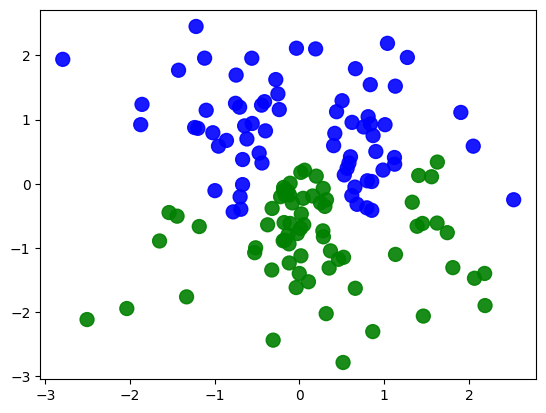

3602/3602 [==============================] - 4s 1ms/step


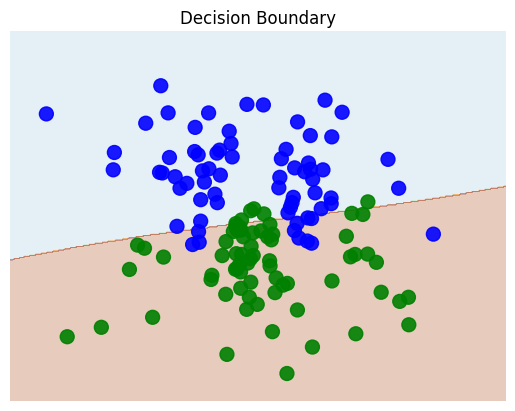

Loss: [0.5942270159721375, 0.591975212097168, 0.5904079675674438, 0.5891431570053101, 0.5879380702972412, 0.5867882966995239, 0.5857028365135193, 0.5846606492996216, 0.583652913570404, 0.5827817320823669, 0.5817188024520874, 0.5809136629104614, 0.5798636078834534, 0.5789453983306885, 0.5780616998672485, 0.5771255493164062, 0.5762622952461243, 0.5753875374794006, 0.5743967294692993, 0.5736198425292969, 0.57264643907547, 0.5717617273330688, 0.5708565711975098, 0.5700689554214478, 0.5690837502479553, 0.5681812763214111, 0.5673006176948547, 0.566327691078186, 0.565490186214447, 0.564624547958374, 0.5636606812477112, 0.5627832412719727, 0.5619102120399475, 0.5610377788543701, 0.5601486563682556, 0.5593469142913818, 0.5583764910697937, 0.5575850009918213, 0.5566518306732178, 0.5557501912117004, 0.5549332499504089, 0.5540012717247009, 0.5531149506568909, 0.5522967576980591, 0.5513368248939514, 0.5505346655845642, 0.5495549440383911, 0.5487731099128723, 0.5478184819221497, 0.5469623804092407, 

In [ ]:
#2nd run
# The model - modify this
model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200,verbose=0) #Verbose=0 to suppress the output from each epoch during the training

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
print("Loss:", history.history['loss'])

The decision boundary outputs a different result each time. So I need to tune it so that it outputs the same decion boundary each time

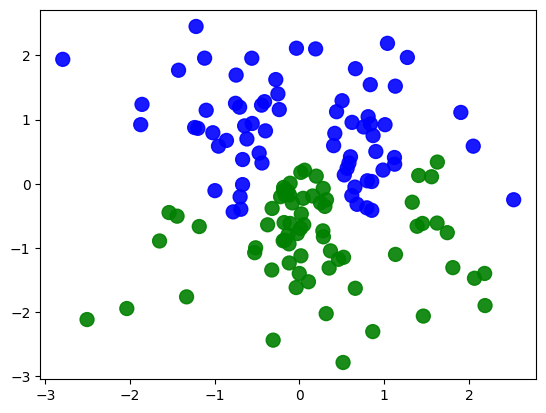

3602/3602 [==============================] - 4s 1ms/step


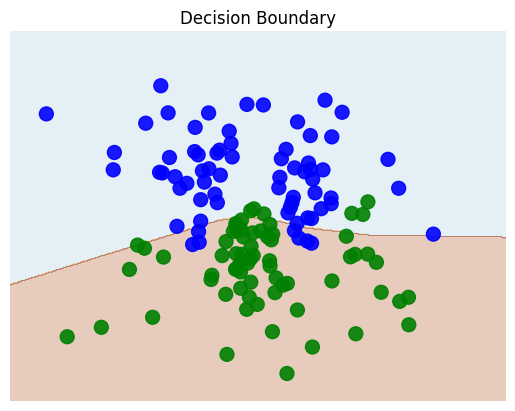

Loss: [0.6671752333641052, 0.6594281792640686, 0.6516811847686768, 0.644270122051239, 0.6369563341140747, 0.6303185820579529, 0.6234106421470642, 0.6168091297149658, 0.6108947396278381, 0.6047795414924622, 0.5987383127212524, 0.5927122235298157, 0.5868438482284546, 0.5808577537536621, 0.5753395557403564, 0.5693892240524292, 0.5636957883834839, 0.5579026341438293, 0.5522420406341553, 0.546664297580719, 0.5409443974494934, 0.5356696844100952, 0.5298805236816406, 0.5243427157402039, 0.5188573598861694, 0.5133996605873108, 0.5078564882278442, 0.5019511580467224, 0.4964952766895294, 0.49053511023521423, 0.4847276210784912, 0.4788980484008789, 0.4731013774871826, 0.46754154562950134, 0.46149566769599915, 0.45581087470054626, 0.4500007927417755, 0.44418978691101074, 0.4383954107761383, 0.43281400203704834, 0.42706483602523804, 0.4212309718132019, 0.41551506519317627, 0.4100593626499176, 0.4042806327342987, 0.39889439940452576, 0.3933933675289154, 0.38820886611938477, 0.3830154538154602, 0.377

In [ ]:
#Modified run
from tensorflow.keras import layers, models, initializers

# The model - modify this
# More complex model
model = keras.models.Sequential()

model.add(layers.Dense(10, input_dim=2, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#first hidden layer with more neurons
model.add(layers.Dense(10, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#second hidden layer
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotUniform(seed=1)))#output layer
model.compile(optimizer='adam', loss='binary_crossentropy')#add optimzer

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200,verbose=0) #Verbose=0 to suppress the output from each epoch during the training

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
print("Loss:", history.history['loss'])

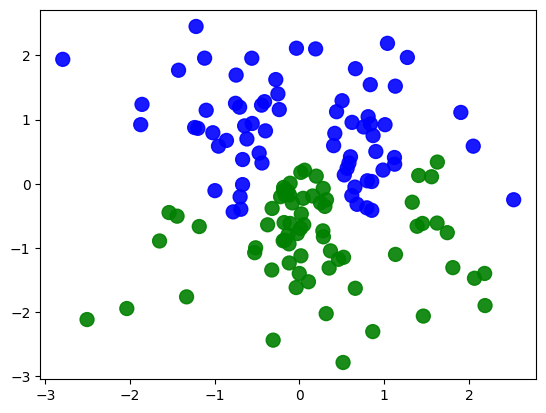

3602/3602 [==============================] - 5s 1ms/step


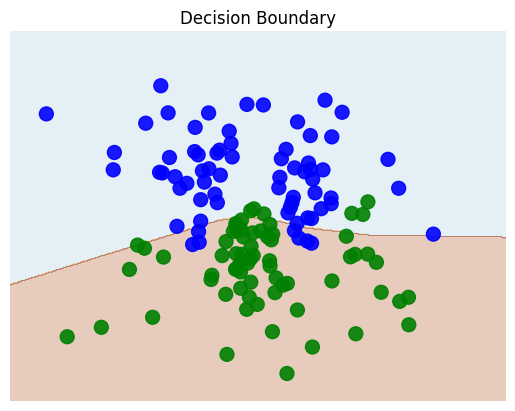

Loss: [0.6671752333641052, 0.6594281792640686, 0.6516811847686768, 0.644270122051239, 0.6369563341140747, 0.6303185820579529, 0.6234106421470642, 0.6168091297149658, 0.6108947396278381, 0.6047795414924622, 0.5987383127212524, 0.5927122235298157, 0.5868438482284546, 0.5808577537536621, 0.5753395557403564, 0.5693892240524292, 0.5636957883834839, 0.5579026341438293, 0.5522420406341553, 0.546664297580719, 0.5409443974494934, 0.5356696844100952, 0.5298805236816406, 0.5243427157402039, 0.5188573598861694, 0.5133996605873108, 0.5078564882278442, 0.5019511580467224, 0.4964952766895294, 0.49053511023521423, 0.4847276210784912, 0.4788980484008789, 0.4731013774871826, 0.46754154562950134, 0.46149566769599915, 0.45581087470054626, 0.4500007927417755, 0.44418978691101074, 0.4383954107761383, 0.43281400203704834, 0.42706483602523804, 0.4212309718132019, 0.41551506519317627, 0.4100593626499176, 0.4042806327342987, 0.39889439940452576, 0.3933933675289154, 0.38820886611938477, 0.3830154538154602, 0.377

In [ ]:
#2nd modified run
from tensorflow.keras import layers, models, initializers

# The model - modify this
# More complex model
model = keras.models.Sequential()

model.add(layers.Dense(10, input_dim=2, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#first hidden layer with more neurons
model.add(layers.Dense(10, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#second hidden layer
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotUniform(seed=1)))#output layer
model.compile(optimizer='adam', loss='binary_crossentropy')#add optimzer

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200,verbose=0) #Verbose=0 to suppress the output from each epoch during the training

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
print("Loss:", history.history['loss'])

You can also just keep running it over a large iteration. But, this method will not be as useful when the model needs to be scaled for larger iternations and trianing time takes a while.

# Worksheet 23 (Isolate)


Name:  Sumatra Dhimoyee

UID: U26967910

### Topics

- Tuning Neural Networks

## Tuning Neural Networks
I ran codeblock from Worksheet 23 (Origional), then disconnercted and deleted runtime. Then I only ran the code blocks from Worksheet 23 (Isolate).

This shows the decision boundary does not change during initial training+lower loss function.

In [ ]:
!pip install tensorflow

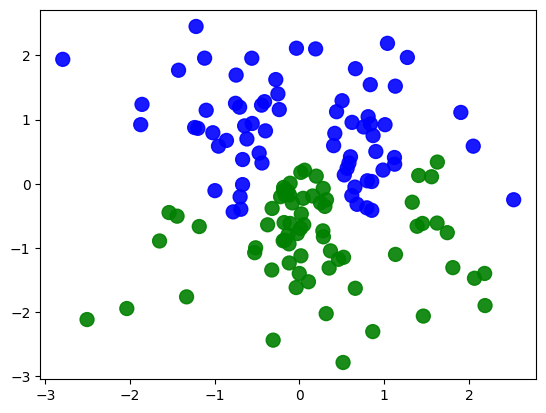

3602/3602 [==============================] - 18s 5ms/step


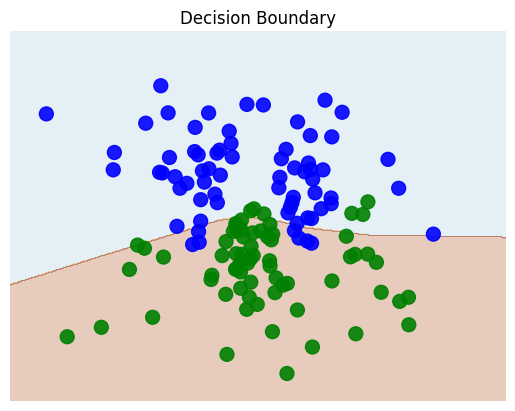

Loss: [0.6671752333641052, 0.6594281792640686, 0.6516811847686768, 0.644270122051239, 0.6369563341140747, 0.6303185820579529, 0.6234106421470642, 0.6168091297149658, 0.6108947396278381, 0.6047795414924622, 0.5987383127212524, 0.5927122235298157, 0.5868438482284546, 0.5808577537536621, 0.5753395557403564, 0.5693892240524292, 0.5636957883834839, 0.5579026341438293, 0.5522420406341553, 0.546664297580719, 0.5409443974494934, 0.5356696844100952, 0.5298805236816406, 0.5243427157402039, 0.5188573598861694, 0.5133996605873108, 0.5078564882278442, 0.5019511580467224, 0.4964952766895294, 0.49053511023521423, 0.4847276210784912, 0.4788980484008789, 0.4731013774871826, 0.46754154562950134, 0.46149566769599915, 0.45581087470054626, 0.4500007927417755, 0.44418978691101074, 0.4383954107761383, 0.43281400203704834, 0.42706483602523804, 0.4212309718132019, 0.41551506519317627, 0.4100593626499176, 0.4042806327342987, 0.39889439940452576, 0.3933933675289154, 0.38820886611938477, 0.3830154538154602, 0.377

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu
from tensorflow.keras import layers, models, initializers

# Set random seed for reproducibility
np.random.seed(1)
random.set_seed(1)

# Data generation - don't modify
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

colors = np.array([x for x in 'bgrcmyk'])

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# The model - modify this
#Default
#model = keras.models.Sequential()
#model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
#model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")

# More complex model
model = keras.models.Sequential()

model.add(layers.Dense(10, input_dim=2, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#first hidden layer with more neurons
model.add(layers.Dense(10, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#second hidden layer
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotUniform(seed=1)))#output layer
model.compile(optimizer='adam', loss='binary_crossentropy')#add optimzer


X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200,verbose=0) #Verbose=0 to suppress the output from each epoch during the training, Verbose=1 for (default) bar, verbose=2 for 1 line per epoch

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
print("Loss:", history.history['loss'])

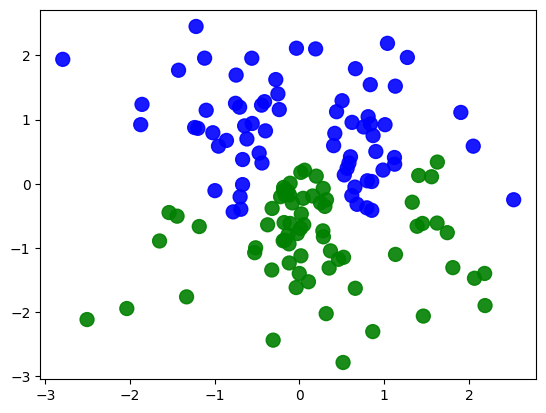

3602/3602 [==============================] - 9s 3ms/step


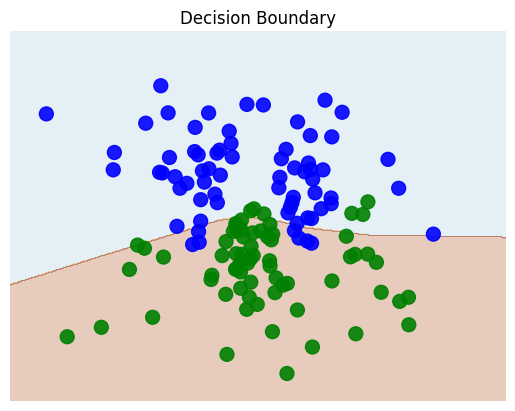

Loss: [0.6671752333641052, 0.6594281792640686, 0.6516811847686768, 0.644270122051239, 0.6369563341140747, 0.6303185820579529, 0.6234106421470642, 0.6168091297149658, 0.6108947396278381, 0.6047795414924622, 0.5987383127212524, 0.5927122235298157, 0.5868438482284546, 0.5808577537536621, 0.5753395557403564, 0.5693892240524292, 0.5636957883834839, 0.5579026341438293, 0.5522420406341553, 0.546664297580719, 0.5409443974494934, 0.5356696844100952, 0.5298805236816406, 0.5243427157402039, 0.5188573598861694, 0.5133996605873108, 0.5078564882278442, 0.5019511580467224, 0.4964952766895294, 0.49053511023521423, 0.4847276210784912, 0.4788980484008789, 0.4731013774871826, 0.46754154562950134, 0.46149566769599915, 0.45581087470054626, 0.4500007927417755, 0.44418978691101074, 0.4383954107761383, 0.43281400203704834, 0.42706483602523804, 0.4212309718132019, 0.41551506519317627, 0.4100593626499176, 0.4042806327342987, 0.39889439940452576, 0.3933933675289154, 0.38820886611938477, 0.3830154538154602, 0.377

In [ ]:


# The model - modify this
#Default
#model = keras.models.Sequential()
#model.add(layers.Dense(3, input_dim=2, activation="sigmoid"))
#model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy")
# More complex model

model = keras.models.Sequential()

model.add(layers.Dense(10, input_dim=2, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#first hidden layer with more neurons
model.add(layers.Dense(10, activation='relu', kernel_initializer=initializers.GlorotUniform(seed=1)))#second hidden layer
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.GlorotUniform(seed=1)))#output layer
model.compile(optimizer='adam', loss='binary_crossentropy')#add optimzer

X, Y = generate_curve_data(t)

# plot the data
plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

history = model.fit(X, Y, batch_size=50, epochs=200,verbose=0) #Verbose=0 to suppress the output from each epoch during the training, Verbose=1 for (default) bar, verbose=2 for 1 line per epoch

# Plot the decision boundary

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
Z = model.predict(meshData)
Z = np.array([0 if x < .5 else 1 for x in Z])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.3, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=colors[Y].tolist(), s=100, alpha=.9)
plt.title("Decision Boundary")
plt.show()
print("Loss:", history.history['loss'])